In [1]:
!pip install pandas

In [2]:
!pip install matplotlib seaborn glob2 ipython librosa numpy scipy soxr
# Before installing librosa we have to install other dependencies also because it has many dependencies in itself.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob2 import glob
import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [4]:
from glob import glob

# Load all .wav files from dolphin, torpedo, and ship folders
audio_files = glob("C:/Users/dhanu/DATASET/Dataset/*/*.wav")

print(audio_files)

['C:/Users/dhanu/DATASET/Dataset\\Cargo\\103.wav', 'C:/Users/dhanu/DATASET/Dataset\\Cargo\\110.wav', 'C:/Users/dhanu/DATASET/Dataset\\Cargo\\15.wav', 'C:/Users/dhanu/DATASET/Dataset\\Cargo\\27.wav', 'C:/Users/dhanu/DATASET/Dataset\\Cargo\\38.wav', 'C:/Users/dhanu/DATASET/Dataset\\Cargo\\41.wav', 'C:/Users/dhanu/DATASET/Dataset\\Cargo\\44.wav', 'C:/Users/dhanu/DATASET/Dataset\\Cargo\\62.wav', 'C:/Users/dhanu/DATASET/Dataset\\Cargo\\69.wav', 'C:/Users/dhanu/DATASET/Dataset\\Cargo\\78.wav', 'C:/Users/dhanu/DATASET/Dataset\\Cargo\\96.wav', 'C:/Users/dhanu/DATASET/Dataset\\Cargo\\99.wav', 'C:/Users/dhanu/DATASET/Dataset\\Dolphins\\spotted_dolphin001.wav', 'C:/Users/dhanu/DATASET/Dataset\\Dolphins\\spotted_dolphin002.wav', 'C:/Users/dhanu/DATASET/Dataset\\Dolphins\\spotted_dolphin003.wav', 'C:/Users/dhanu/DATASET/Dataset\\Dolphins\\spotted_dolphin004.wav', 'C:/Users/dhanu/DATASET/Dataset\\Dolphins\\spotted_dolphin005.wav', 'C:/Users/dhanu/DATASET/Dataset\\Dolphins\\spotted_dolphin006.wav', '

In [5]:
# LABEL = SHIP TYPE

print(len(audio_files))

299


In [6]:
ipd.Audio(audio_files[50])


In [7]:
!pip install librosa

In [8]:
!pip show librosa

Name: librosa
Version: 0.11.0
Summary: Python module for audio and music processing
Home-page: https://librosa.org
Author: Brian McFee, librosa development team
Author-email: brian.mcfee@nyu.edu
License: ISC
Location: c:\users\dhanu\crnn_env\lib\site-packages
Requires: audioread, decorator, joblib, lazy_loader, msgpack, numba, numpy, pooch, scikit-learn, scipy, soundfile, soxr, typing_extensions
Required-by: 


In [9]:
import librosa

In [10]:
#pip install --upgrade paramiko cryptography


In [11]:
pip install cryptography==42.0.8


Note: you may need to restart the kernel to use updated packages.


In [12]:
!pip show cryptography
!pip show pyopenssl



Name: cryptography
Version: 42.0.8
Summary: cryptography is a package which provides cryptographic recipes and primitives to Python developers.
Home-page: https://github.com/pyca/cryptography
Author: 
Author-email: The Python Cryptographic Authority and individual contributors <cryptography-dev@python.org>
License: Apache-2.0 OR BSD-3-Clause
Location: c:\users\dhanu\crnn_env\lib\site-packages
Requires: cffi
Required-by: 


In [13]:
y, sr = librosa.load(audio_files[48])
# y -> raw data of the audio file
# sr -> sampling rate of the audio file

In [14]:
# print(f'y: {y[:10]}')
# print(f'y shape: {y.shape}')
# print(f'sr: {sr}')

In [15]:
# pd.Series(y).plot(figsize=(10, 5),lw = 1,color = color_pal[0])
# plt.title('Raw audio signal')
# plt.xlabel('Time (samples)')
# plt.ylabel('Amplitude')
# plt.show()

In [16]:
# y_trimmed, _ = librosa.effects.trim(y,top_db=20)
# #  help to trim(remove) empty spaces...plane lines 
# pd.Series(y).plot(figsize=(10, 5),lw = 1,color = color_pal[1])
# plt.title('Raw audio Trimmed signal')
# plt.xlabel('Time (samples)')
# plt.ylabel('Amplitude')
# plt.show()

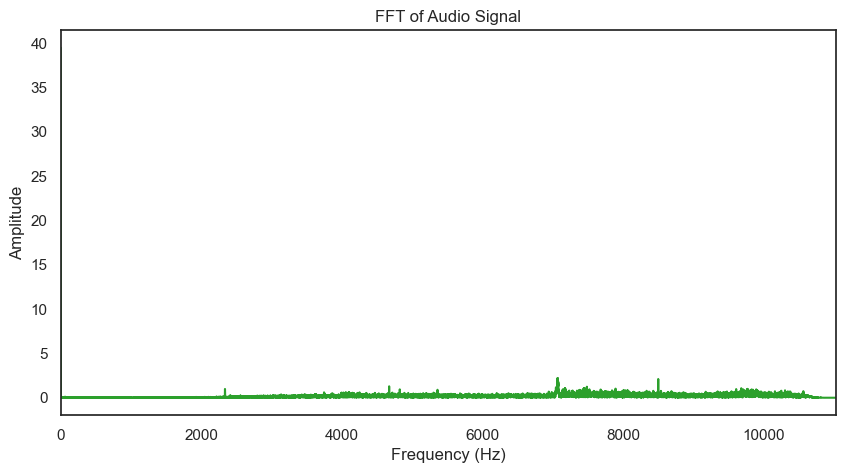

In [17]:
# Compute the Fast Fourier Transform (FFT) of the audio signal
# This will convert the time-domain signal into the frequency domain.
# The FFT is a powerful algorithm to compute the Discrete Fourier Transform (DFT) and its inverse.
fft_vals = np.fft.fft(y)
fft_freq = np.fft.fftfreq(len(fft_vals), 1/sr)

# Only take the positive frequencies
pos_mask = fft_freq >= 0
fft_freq = fft_freq[pos_mask]
fft_power = np.abs(fft_vals[pos_mask])

plt.figure(figsize=(10, 5))
plt.plot(fft_freq, fft_power, color=color_pal[2])
plt.title('FFT of Audio Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim([0, sr/2])
plt.show()

In [18]:
# pd.Series(y[2000:2100]).plot(figsize=(20, 5),lw = 1,color = color_pal[2])
# plt.title('Raw audio Zoomed in signal')
# plt.xlabel('Time (samples)')
# plt.ylabel('Amplitude')
# plt.show()


In [19]:
# # Calculate average power (mean of squared amplitude)
# avg_power = np.mean(fft_power ** 2)

# # Intensity is often proportional to power for audio signals
# avg_intensity = avg_power

# # Sample rate is already given by sr
# avg_sample_rate = sr

# # Loudness can be estimated as the mean dB value of the FFT power (avoid log(0) by adding small epsilon)
# epsilon = 1e-10
# loudness_db = 10 * np.log10(fft_power + epsilon)
# avg_loudness = np.mean(loudness_db)

# print(f"Average Power: {avg_power}")
# print(f"Average Intensity: {avg_intensity}")
# print(f"Sample Rate: {avg_sample_rate}")
# print(f"Average Loudness (dB): {avg_loudness}")

In [20]:
# # Compute the Short-Time Fourier Transform (STFT)
# # This will give us a time-frequency representation of the audio signal
# trans = librosa.stft(y)
# spect_db = librosa.amplitude_to_db(np.abs(trans), ref=np.max)
# spect_db.shape

In [21]:
# # Plot the transformed audio data
# fig , ax = plt.subplots(figsize=(10, 5))
# img = librosa.display.specshow(spect_db,x_axis='time', y_axis='log', ax=ax)
# ax.set_title('Spectrogram of audio signal')
# fig.colorbar(img, ax=ax, format="%+2.f dB")

Mel Spectrogram

In [22]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.amplitude_to_db(S, ref=np.max)

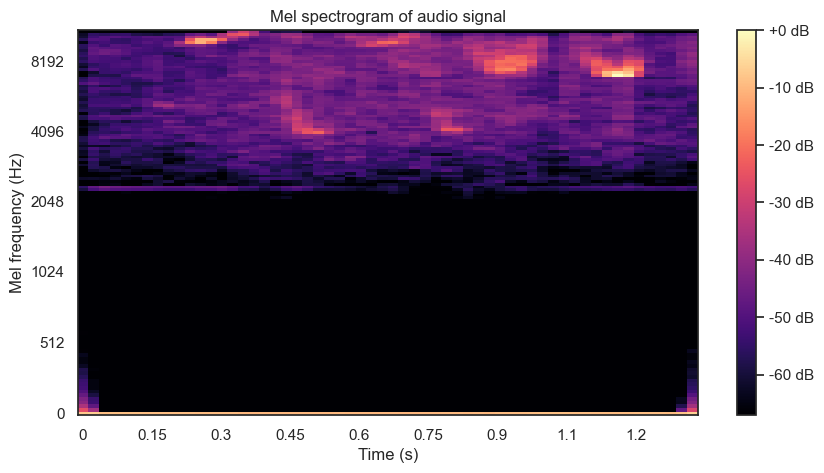

In [23]:
fig,ax =  plt.subplots(figsize=(10, 5))
plt.title('Mel spectrogram of audio signal')
# plot the mel spectrogram

img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(img, format="%+2.f dB")
plt.xlabel('Time (s)')
plt.ylabel('Mel frequency (Hz)')  
plt.show()

--Data Preprocessing--

In [24]:
# import os
# import numpy as np
# from glob import glob
# import librosa
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder


Step-1: Getting File Paths and Labels

In [25]:
# # Path to your dataset
# base_path = "C:/Users/dhanu/DATASET/Dataset"

# # Get all .wav files from all subfolders
# audio_files = glob(base_path + "/*/*.wav")

# # Extract labels (folder names like dolphin, torpedo, ship)
# labels = [file.split("\\")[-2] for file in audio_files]

# # Encode string labels to integers
# le = LabelEncoder()
# encoded_labels = le.fit_transform(labels)

# print("Classes:", le.classes_)  # Output: ['dolphin' 'ship' 'torpedo']


Step-2: Define a Function to Extract Features (e.g., MFCC)

In [26]:
# def extract_features(file_path, max_pad_len=862):  # 862 = around 5 sec for 22050Hz
#     try:
#         audio, sample_rate = librosa.load(file_path, sr=22050)
#         mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        
#         # Padding or trimming to fixed length
#         if mfcc.shape[1] < max_pad_len:
#             pad_width = max_pad_len - mfcc.shape[1]
#             mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
#         else:
#             mfcc = mfcc[:, :max_pad_len]
        
#         return mfcc
#     except Exception as e:
#         print("Error processing", file_path, ":", e)
#         return None

Step-3: Apply Feature Extraction on All Files

In [27]:
# features = []
# final_labels = []

# for i, file_path in enumerate(audio_files):
#     mfcc = extract_features(file_path)
#     if mfcc is not None:
#         features.append(mfcc)
#         final_labels.append(encoded_labels[i])


Step-4: Convert to NumPy Arrays for Model Input

In [28]:
# X = np.array(features)                     # Shape: (num_samples, 40, 862)
# X = X[..., np.newaxis]                    # Add channel dimension for CNN: (samples, 40, 862, 1)
# y = np.array(final_labels)

# print("X shape:", X.shape)
# print("y shape:", y.shape)


**Marine Acoustic Signature Classification using CRNN**

In [29]:
import os
from sklearn.preprocessing import LabelEncoder

In [30]:

# Get all .wav files from all subfolders
audio_files = glob("C:/Users/dhanu/DATASET/Dataset/*/*.wav")

# Extract labels (folder names like dolphin, torpedo, ship)
labels = [file.split("\\")[-2] for file in audio_files]

# Encode string labels to integers
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)

print("Classes:", le.classes_)  # Output: ['dolphin' 'ship' 'torpedo']


Classes: ['Cargo' 'Dolphins' 'Passengership' 'Submarine' 'Tanker' 'Torpedo' 'Tug'
 'Whale']


In [31]:
#Step-2: Define a Function to Extract Features (e.g., MFCC) 

In [32]:
def extract_features(file_path, max_pad_len=862):  # 862 = around 5 sec for 22050Hz
    try:
        audio, sample_rate = librosa.load(file_path, sr=22050)
        mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        
        # Padding or trimming to fixed length
        if mfcc.shape[1] < max_pad_len:
            pad_width = max_pad_len - mfcc.shape[1]
            mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc = mfcc[:, :max_pad_len]
        
        return mfcc
    except Exception as e:
        print("Error processing", file_path, ":", e)
        return None

In [33]:
# Apply Feature Extraction on All Files

In [34]:
import os
import numpy as np

def extract_features_from_directory(directory_path):
    features = []
    labels = []

    for label in os.listdir(directory_path):
        label_path = os.path.join(directory_path, label)

        if not os.path.isdir(label_path):
            continue  # Skip non-directory files

        for file in os.listdir(label_path):
            if file.endswith(".wav"):  # or ".mp3", depending on your dataset
                file_path = os.path.join(label_path, file)

                mfcc = extract_features(file_path)

                if mfcc is not None:
                    features.append(mfcc.flatten())  # flatten if needed
                    labels.append(label)

    return np.array(features), np.array(labels)


In [35]:
x, y = extract_features_from_directory("C:/Users/dhanu/DATASET/Dataset")

print("Features shape:", x.shape)
print("Labels shape:", y.shape)


Features shape: (299, 34480)
Labels shape: (299,)


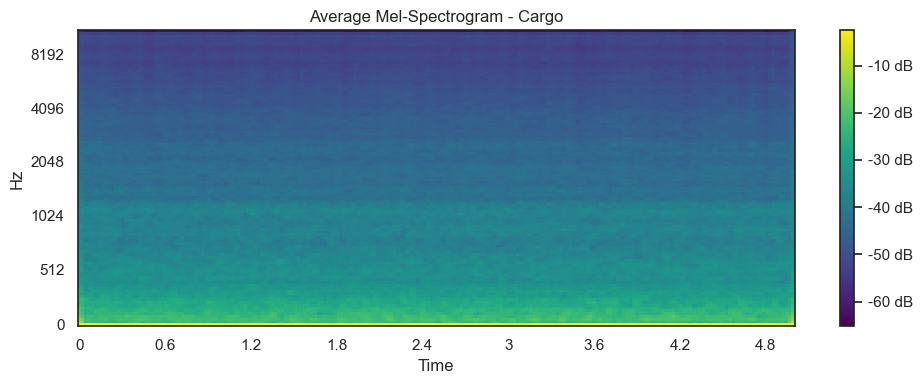

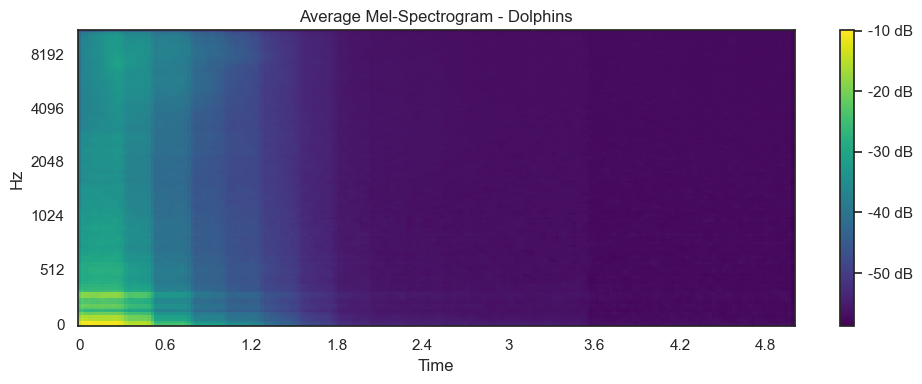

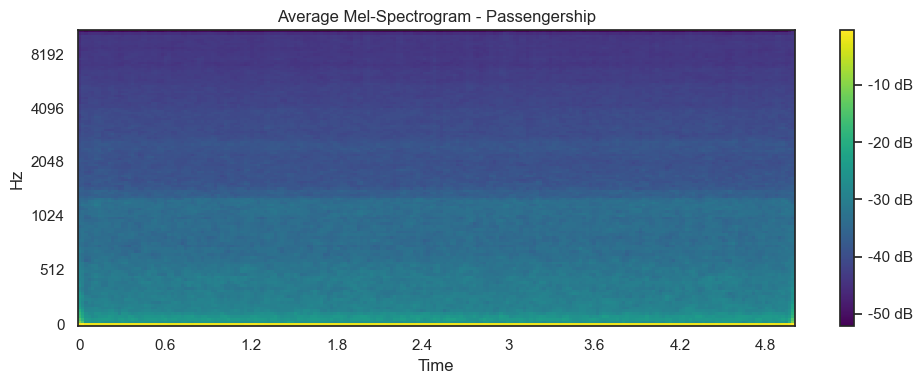

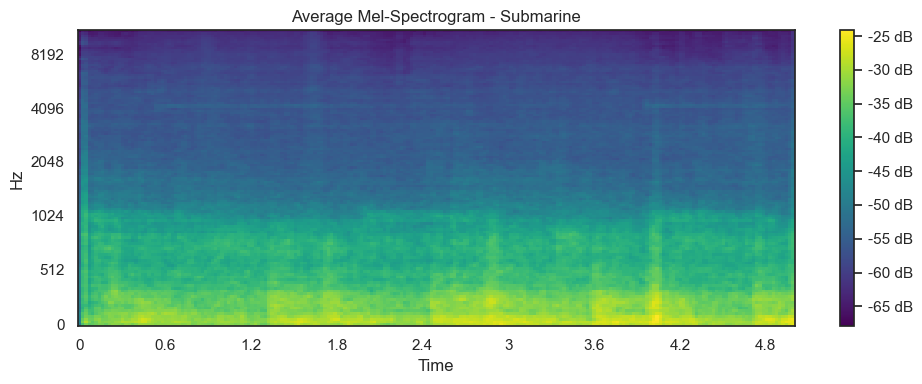

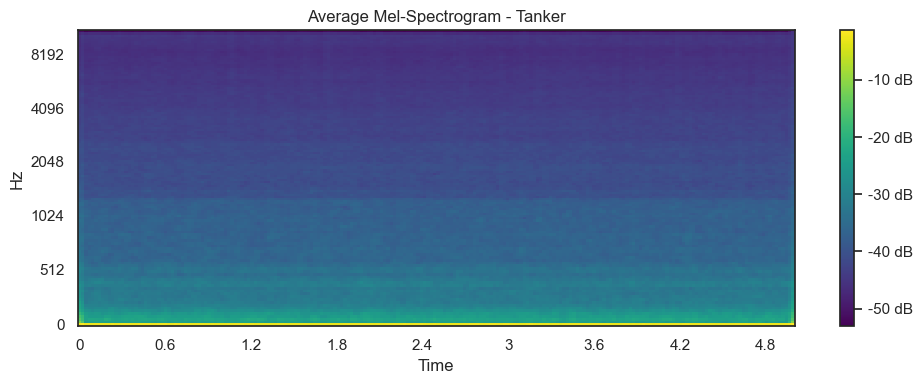

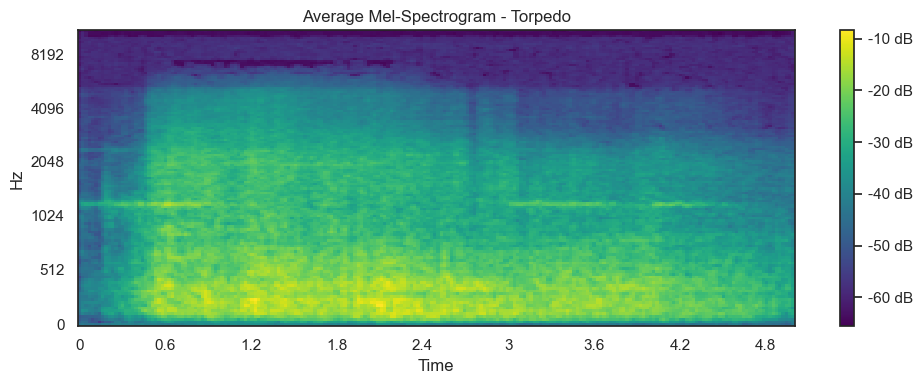

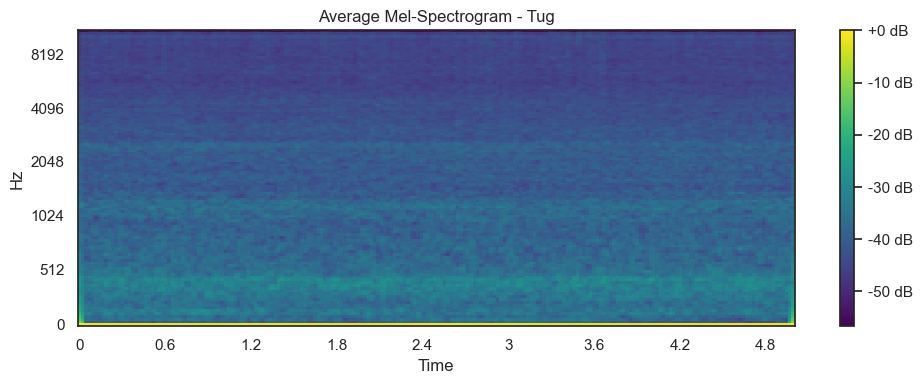

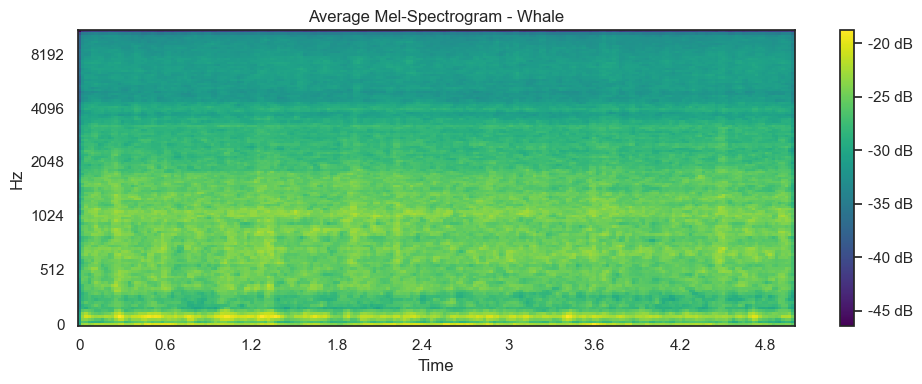

In [129]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# 🔧 Parameters
DATASET_PATH = "C:/Users/dhanu/DATASET/Dataset"  # Root folder containing class folders
SAMPLE_RATE = 22050
N_MELS = 128
HOP_LENGTH = 512
DURATION = 5  # seconds
FIXED_LEN = SAMPLE_RATE * DURATION

# 🎧 Add Noise Function
def add_noise(data, noise_level=0.005):
    noise = np.random.randn(len(data))
    return data + noise_level * noise

# 🔁 Loop through each class/category
for category in os.listdir(DATASET_PATH):
    class_path = os.path.join(DATASET_PATH, category)
    if not os.path.isdir(class_path):
        continue

    mel_specs = []

    for file in os.listdir(class_path):
        if file.endswith('.wav'):
            file_path = os.path.join(class_path, file)

            # 🔊 Load audio
            y, sr = librosa.load(file_path, sr=SAMPLE_RATE)

            # 🩹 Pad or truncate
            if len(y) < FIXED_LEN:
                y = np.pad(y, (0, FIXED_LEN - len(y)))
            else:
                y = y[:FIXED_LEN]

            if np.random.rand() < 0.5:  # 50% chance
                y = add_noise(y)


            # 📊 Convert to mel-spectrogram
            mel_spec = librosa.feature.melspectrogram(
                y=y, sr=sr, n_mels=N_MELS, hop_length=HOP_LENGTH)
            mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

            mel_specs.append(mel_spec_db)

    if mel_specs:
        # 📚 Stack and average
        mel_specs = np.stack(mel_specs)
        avg_mel_spec = np.mean(mel_specs, axis=0)

        # 🖼️ Plot the average spectrogram
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(avg_mel_spec, sr=SAMPLE_RATE, hop_length=HOP_LENGTH,
                                 x_axis='time', y_axis='mel', cmap='viridis')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Average Mel-Spectrogram - {category}')
        plt.tight_layout()
        plt.show()


In [130]:
import os
import librosa
import numpy as np

def compute_average_fft_per_label(directory_path):
    label_fft_averages = {}
    sample_rate = None  # Optional: capture the sample rate (22050 by default)

    for label in os.listdir(directory_path):
        label_path = os.path.join(directory_path, label)
        if not os.path.isdir(label_path):
            continue

        fft_list = []

        for file in os.listdir(label_path):
            if file.endswith(".wav"):
                file_path = os.path.join(label_path, file)
                
                # Load the audio file
                audio, sr = librosa.load(file_path, sr=22050)
                sample_rate = sr

                # Compute FFT (positive frequencies only)
                fft = np.abs(np.fft.fft(audio))[:len(audio) // 2]
                fft_list.append(fft)

        # Average the FFTs for this label
        if fft_list:
            min_len = min(len(f) for f in fft_list)
            trimmed_ffts = [f[:min_len] for f in fft_list]
            average_fft = np.mean(trimmed_ffts, axis=0)
            label_fft_averages[label] = average_fft

    return label_fft_averages, sample_rate


In [131]:
import matplotlib.pyplot as plt
import numpy as np

def plot_fft_subplots(fft_data, sample_rate, zoom_hz=5000):
    num_labels = len(fft_data)
    fig, axes = plt.subplots(num_labels, 1, figsize=(12, 3 * num_labels), sharex=True)

    if num_labels == 1:
        axes = [axes]

    for ax, (label, fft) in zip(axes, fft_data.items()):
        # Normalize
        norm_fft = fft / np.max(fft)

        # Frequency axis (in Hz)
        freqs = np.fft.fftfreq(len(fft) * 2, d=1/sample_rate)[:len(fft)]

        # Limit to zoom range
        max_bin = np.argmax(freqs >= zoom_hz) if np.any(freqs >= zoom_hz) else len(freqs)

        ax.plot(freqs[:max_bin], norm_fft[:max_bin])
        ax.set_title(f"FFT for {label}")
        ax.set_ylabel("Normalized Magnitude")
        ax.grid(True)

    axes[-1].set_xlabel("Frequency (Hz)")
    plt.tight_layout()
    plt.show()


In [132]:
fft_data, sr = compute_average_fft_per_label("C:/Users/dhanu/DATASET/Dataset")


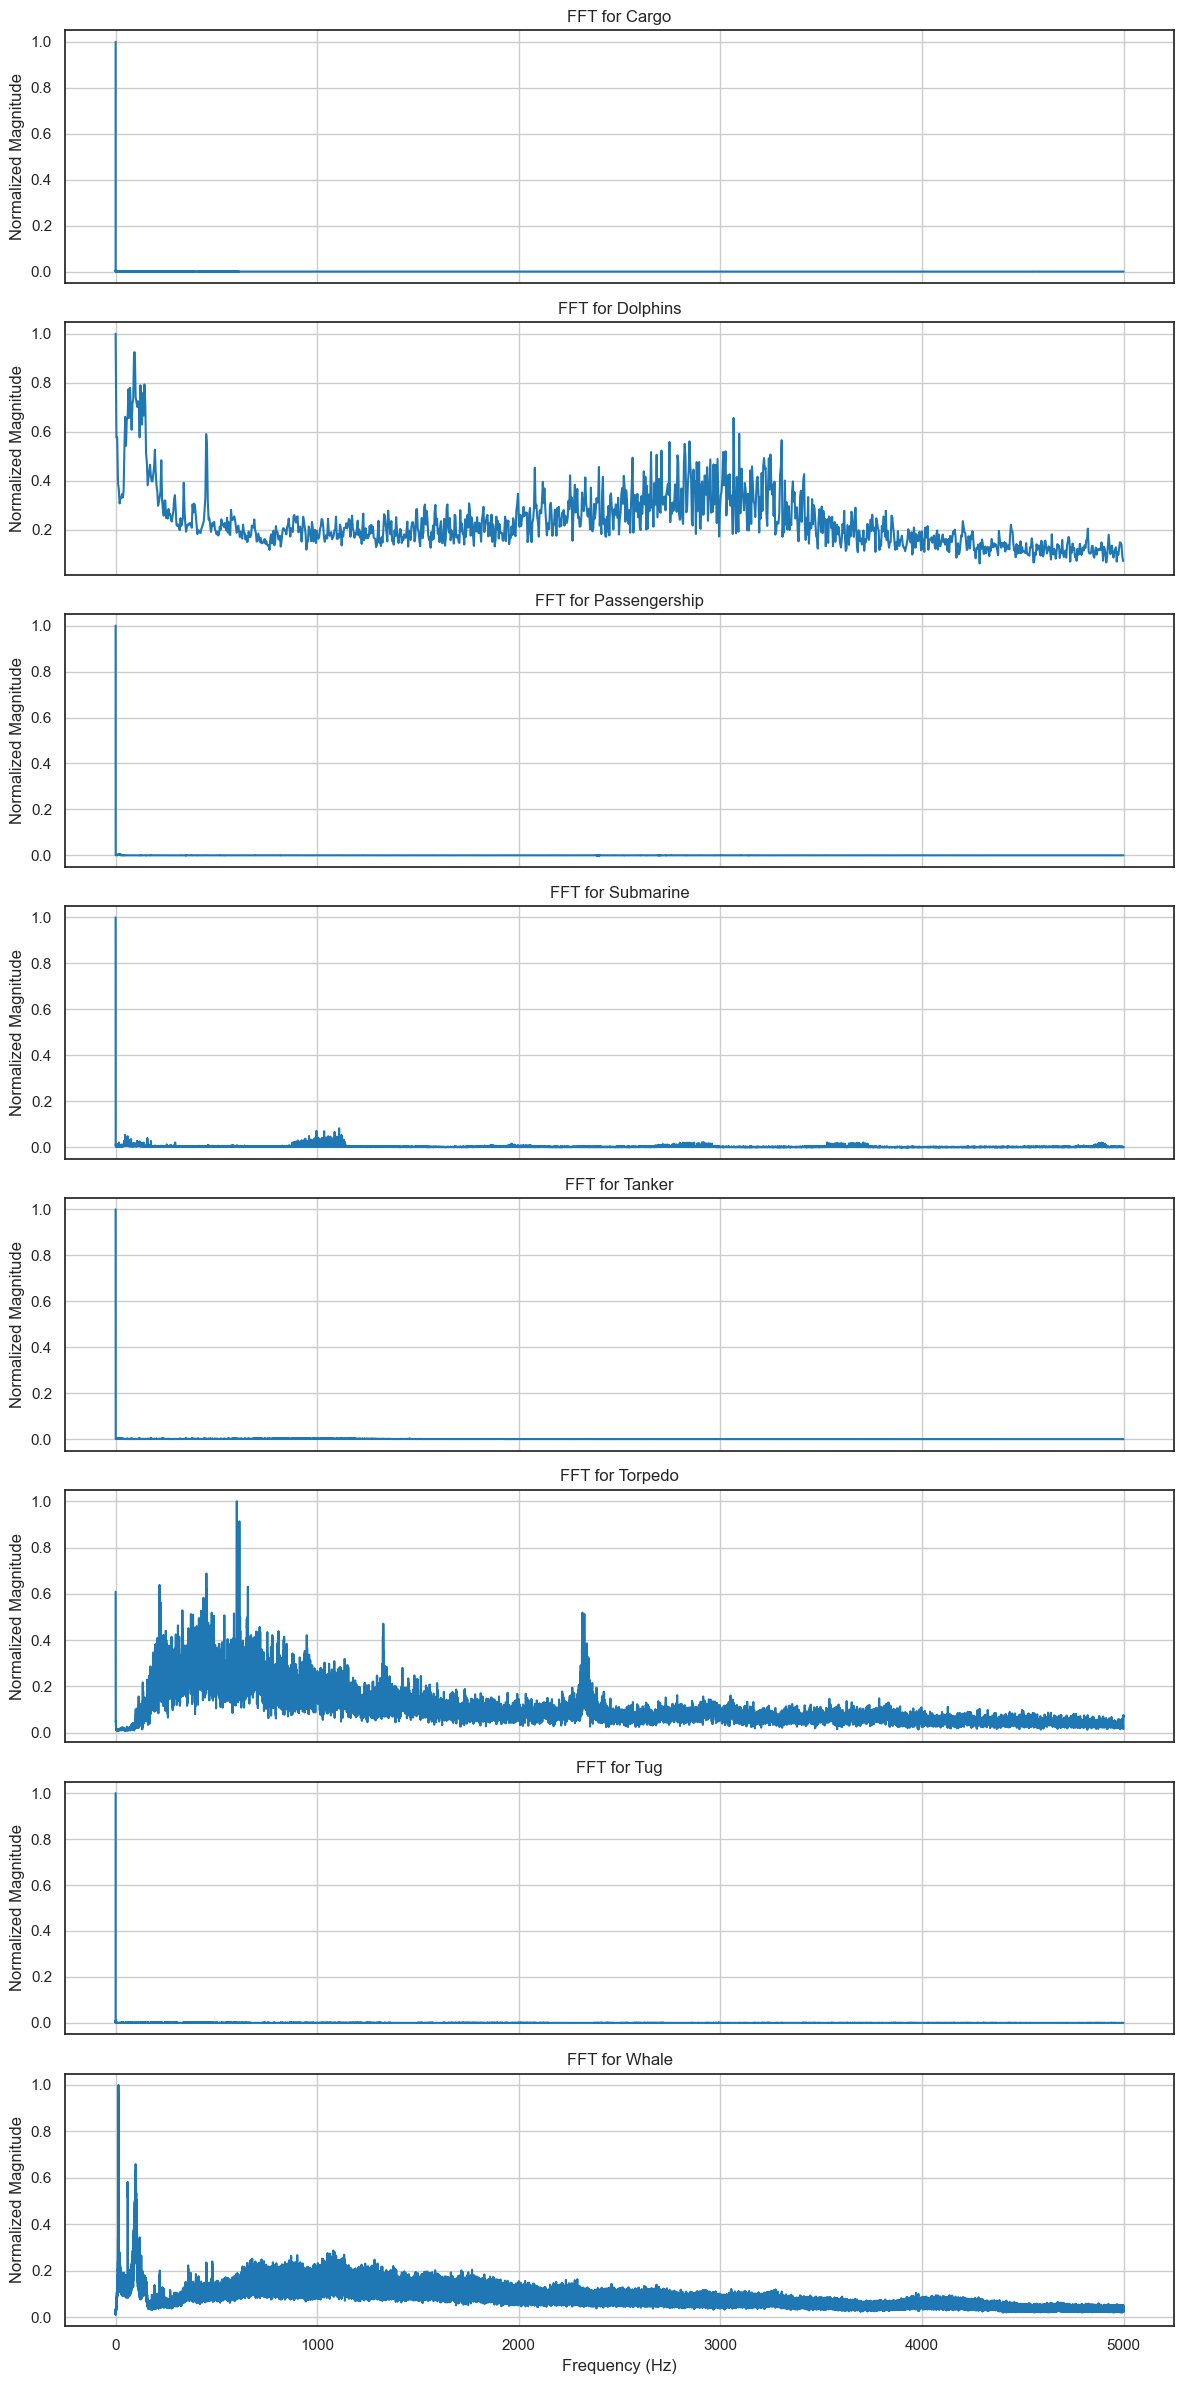

In [133]:
plot_fft_subplots(fft_data, sr, zoom_hz=5000)

C:\Users\dhanu\crnn_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


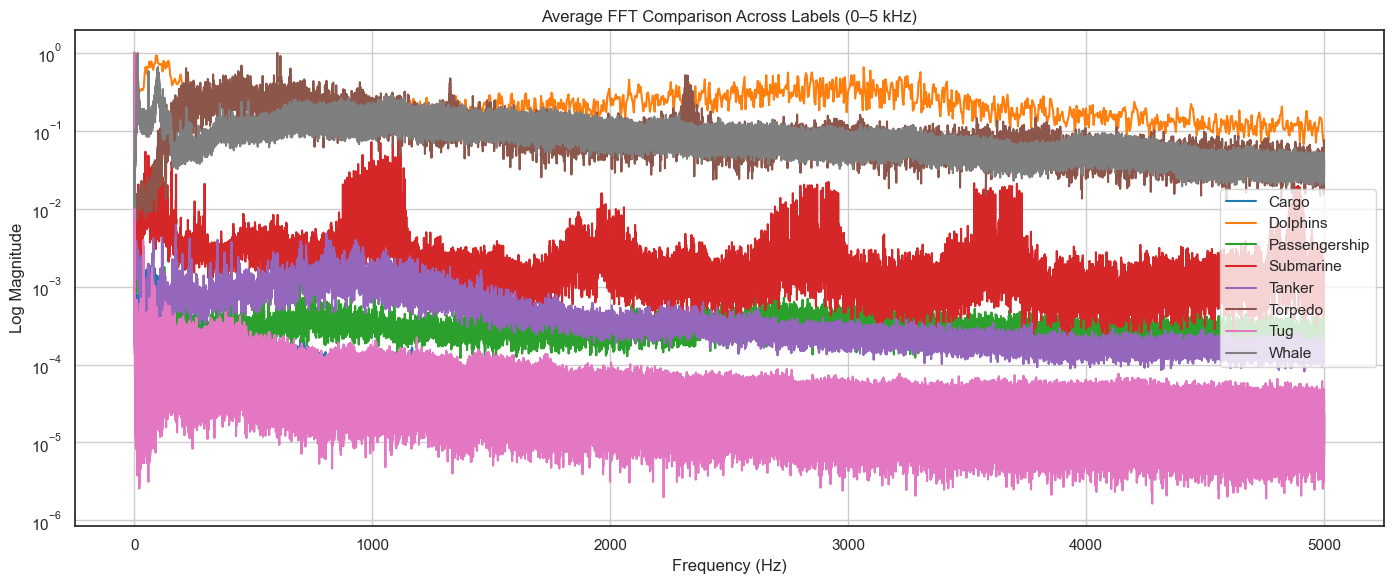

In [134]:
averages, sr = compute_average_fft_per_label("C:/Users/dhanu/DATASET/Dataset")

plt.figure(figsize=(14, 6))

for label, avg_fft in averages.items():
    # Normalize for fair comparison
    normalized_fft = avg_fft / np.max(avg_fft)
    
    # Convert bin index to frequency in Hz
    freqs = np.fft.fftfreq(len(avg_fft) * 2, d=1/sr)[:len(avg_fft)]
    
    # Plot the first N Hz
    max_hz = 5000
    max_bin = np.argmax(freqs >= max_hz) if np.any(freqs >= max_hz) else len(freqs)
    
    plt.plot(freqs[:max_bin], normalized_fft[:max_bin], label=label)

plt.title("Average FFT Comparison Across Labels (0–5 kHz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Normalized Magnitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.yscale("log")
plt.ylabel("Log Magnitude")
plt.show()


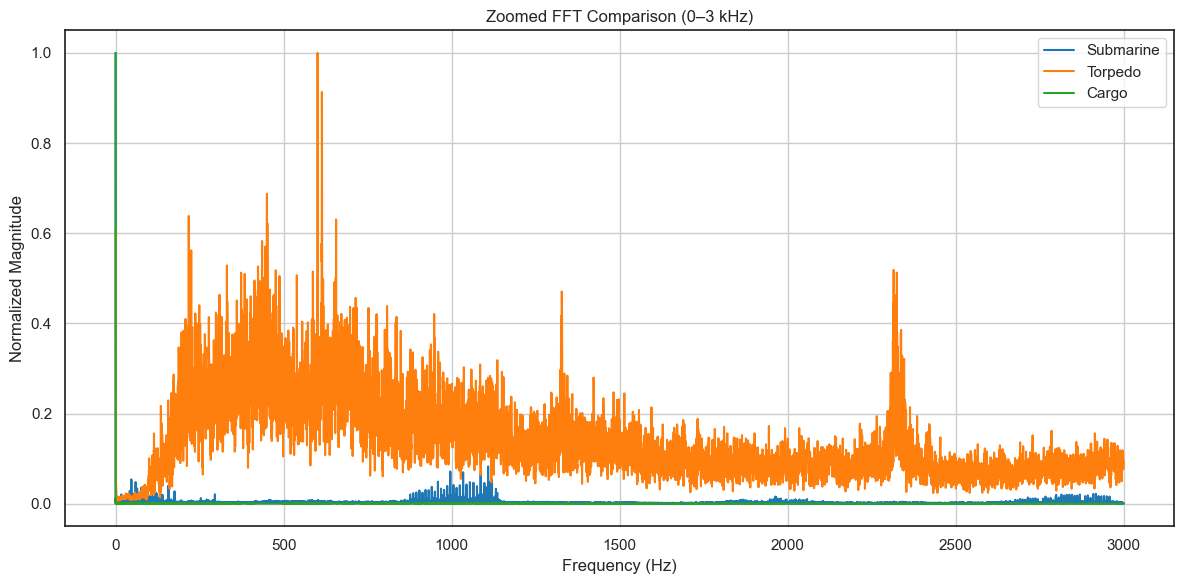

In [135]:
labels_to_plot = ['Submarine', 'Torpedo', 'Cargo']

plt.figure(figsize=(12, 6))
for label in labels_to_plot:
    fft = averages[label]
    norm_fft = fft / np.max(fft)
    freqs = np.fft.fftfreq(len(fft) * 2, d=1/sr)[:len(fft)]
    max_hz = 3000
    max_bin = np.argmax(freqs >= max_hz)
    plt.plot(freqs[:max_bin], norm_fft[:max_bin], label=label)

plt.title("Zoomed FFT Comparison (0–3 kHz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Normalized Magnitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [136]:
# Training --> CRNN


In [137]:
!pip install scikit-learn 

In [138]:
!python --version



Python 3.10.0


In [139]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LSTM, TimeDistributed, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [141]:
# DATA PREPARATION FOR TRAINING A CRNN MODEL:
# Extracting MFCC features
# Encoding labels
# Formatting data for CNN-RNN input
# Splitting into train and test sets



In [142]:
# Loads an audio file and extracts MFCC (Mel Frequency Cepstral Coefficients)—a compact representation of audio.

def extract_features(file_path, max_pad_len=862):
    audio, sample_rate = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    if mfcc.shape[1] < max_pad_len:
        pad_width = max_pad_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_pad_len]
    return mfcc


In [143]:
# For each audio file in the folder, it: Extracts MFCC features.
# Appends the MFCC to features, and its label to labels.

In [144]:
features = []
labels = []

for label in os.listdir("C:/Users/dhanu/DATASET/Dataset"):
    class_dir = os.path.join("C:/Users/dhanu/DATASET/Dataset", label)
    if not os.path.isdir(class_dir):
        continue

    for file in os.listdir(class_dir):
        if file.endswith(".wav"):
            file_path = os.path.join(class_dir, file)
            mfcc = extract_features(file_path)
            features.append(mfcc)
            labels.append(label)



C:\Users\dhanu\crnn_env\lib\site-packages\librosa\feature\spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


In [145]:
# CNN expects 4D input: (samples, height, width, channels).
# We add the last channel dimension (1) to fit this shape.

import numpy as np

x = np.array(features)  # shape = (num_samples, 40, 862)
x = x[..., np.newaxis]  # shape = (num_samples, 40, 862, 1)


In [146]:
# LabelEncoder: Converts string labels to integers
# to_categorical: Converts integer labels to one-hot encoding

le = LabelEncoder()
y = le.fit_transform(labels)  # e.g., ['torpedo', 'ship'] -> [0, 1]
y = tf.keras.utils.to_categorical(y)  # e.g., [0, 1] -> [[1,0], [0,1]]


In [147]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)


*Testing of data*

In [ ]:
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (239, 40, 862, 1)
y_train shape: (239, 8)


In [109]:
# MODEL BUILDING 
# CNN to extract spatial features from MFCCs
# RNN (LSTM) to capture temporal dependencies
# A final Dense layer for classification

In [149]:
def add_noise(audio, noise_level=0.005):
    noise = np.random.randn(len(audio))
    return audio + noise_level * noise


In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, TimeDistributed
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization, Input, Activation
from tensorflow.keras import regularizers

model = Sequential()

# 📌 Input Layer
model.add(Input(shape=(40, 862, 1)))

# 🧠 Conv Layer 1 — Keep L2, reduce Dropout to prevent early underfitting
model.add(Conv2D(32, (3, 3), padding='same',
                 kernel_regularizer=regularizers.l2(0.0005)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 🧠 Conv Layer 2 — Moderate Dropout, reduced L2 regularization
model.add(Conv2D(64, (3, 3), padding='same',
                 kernel_regularizer=regularizers.l2(0.0005)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 🧠 Conv Layer 3 — Deeper dropout kept for strong regularization
model.add(Conv2D(128, (3, 3), padding='same',
                 kernel_regularizer=regularizers.l2(0.0005)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# 🔄 TimeDistributed Flatten
model.add(TimeDistributed(Flatten()))

# 🔁 LSTM — Add recurrent_dropout, moderate dropout
model.add(LSTM(64, return_sequences=False, dropout=0.3, recurrent_dropout=0.2))
model.add(Dropout(0.3))

# 🎯 Output Layer
model.add(Dense(y.shape[1], activation='softmax'))


In [151]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True)


In [156]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=40,
    batch_size=32,
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.8924 - loss: 0.3492 - val_accuracy: 0.7083 - val_loss: 0.7658
Epoch 2/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.8529 - loss: 0.3699 - val_accuracy: 0.7917 - val_loss: 0.7207
Epoch 3/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.8822 - loss: 0.3778 - val_accuracy: 0.7708 - val_loss: 0.7316
Epoch 4/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8776 - loss: 0.3548 - val_accuracy: 0.7708 - val_loss: 0.7392
Epoch 5/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8943 - loss: 0.3239 - val_accuracy: 0.7500 - val_loss: 0.7590
Epoch 6/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.9246 - loss: 0.2915 - val_accuracy: 0.7708 - val_loss: 0.7331
Epoch 7/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.8912 - loss: 0.3560 - val_accuracy: 0.8333 - val_loss: 0.7266
Epoch 8/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.9069 - loss: 0.3108 - val_accuracy: 0.7708 - val_loss: 0.7462
Epoch 9/

In [159]:
from collections import Counter
print(Counter(y_train.argmax(axis=1)))  # if categorical


Counter({np.int64(1): 155, np.int64(4): 22, np.int64(7): 17, np.int64(2): 16, np.int64(3): 11, np.int64(0): 10, np.int64(5): 6, np.int64(6): 2})


In [160]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train.argmax(axis=1)),
    y=y_train.argmax(axis=1)
)
class_weights_dict = dict(enumerate(class_weights))


In [161]:
from sklearn.utils import class_weight
import numpy as np

# Compute class weights (only if y_train is one-hot encoded)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(np.argmax(y_train, axis=1)),
    y=np.argmax(y_train, axis=1)
)
class_weights_dict = dict(enumerate(class_weights))

# ✅ Early stopping and checkpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True)

# ✅ Model training with class weights
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=40,
    batch_size=32,
    callbacks=[early_stop, checkpoint],
    class_weight=class_weights_dict,  # 👈 this handles class imbalance
    verbose=1
)


Epoch 1/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8587 - loss: 0.8280

6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.8595 - loss: 0.8498 - val_accuracy: 0.7292 - val_loss: 0.7610
Epoch 2/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9126 - loss: 0.9185 - val_accuracy: 0.7083 - val_loss: 0.7746
Epoch 3/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8927 - loss: 1.4966

6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.8886 - loss: 1.4385 - val_accuracy: 0.6875 - val_loss: 0.7605
Epoch 4/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8683 - loss: 0.9332 - val_accuracy: 0.7292 - val_loss: 0.8354
Epoch 5/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.8988 - loss: 1.1890 - val_accuracy: 0.6875 - val_loss: 0.8823
Epoch 6/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8899 - loss: 0.9125 - val_accuracy: 0.6667 - val_loss: 0.8992
Epoch 7/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9077 - loss: 0.9854 - val_accuracy: 0.6667 - val_loss: 0.8845
Epoch 8/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.9033 - loss: 0.8644 - val_accuracy: 0.7083 - val_loss: 0.8251
Epoch 9/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9256 - loss: 0.6602 - val_accuracy: 0.7500 - val_loss: 0.7787
Epoch 10/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9492 - loss: 0.5608 - val_accuracy: 0.7500 - val_loss: 0.8279
Epoch 11/40
6/6 ━━

In [185]:
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Validation Accuracy: {val_acc:.2f}")


Train Accuracy: 0.92
Validation Accuracy: 0.69


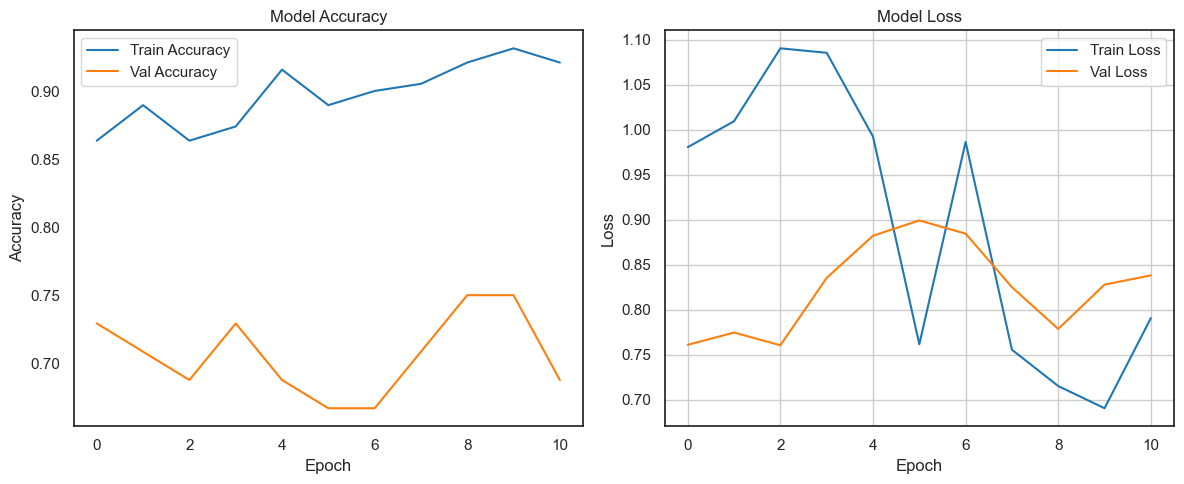

In [186]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.grid()
plt.show()


In [187]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 439ms/step - accuracy: 0.8472 - loss: 0.4582
Test Accuracy: 83.33%


In [188]:
# ADD NOISE
# Add Noise:-	Simulates real-world microphone noise, audio + 0.005 * np.random.randn(len(audio))
def add_noise(data, noise_level=0.005):
    noise = np.random.randn(len(data))
    return data + noise_level * noise



In [189]:
# TIME SHIFTING
# Time Shifting	:- Shifts the waveform slightly left/right,np.roll(audio, shift_amt)
def shift_audio(audio, shift_max=2):
    shift = np.random.randint(-shift_max, shift_max)
    return np.roll(audio, shift)


In [190]:
# MODEL COMPILATION
# adam: Adaptive optimizer (fast & effective)
# categorical_crossentropy: Best for multi-class classification
# accuracy: Metric to monitor training

In [191]:
# MODEL TRAINING
# epochs=40: Number of training cycles (you can tune this later)
# batch_size=16: Number of samples processed at once (balance between memory and speed)


# An epoch is one complete pass through the entire training dataset.
# If you have 1000 audio samples and you train for 1 epoch, the model sees each sample once.
# If you train for 40 epochs, it sees the same 1000 samples 40 times, adjusting weights slightly each time.

In [192]:
# MODEL EVALUATION
# This gives the final test accuracy after training.

In [177]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 447ms/step - accuracy: 0.8472 - loss: 0.4582
Test Accuracy: 83.33%


In [178]:
# ACCURACY PLOT OVER EPOCHS
# This helps you check for overfitting or underfitting.

# During training, we monitor:
# training accuracy — how well the model fits known data
# validation accuracy — how well it performs on unseen data

# A healthy curve:
# Training & validation accuracy both increase and level off
# Validation accuracy doesn’t drop too soon

# A bad curve (overfitting):
# Training accuracy increases continuously
# Validation accuracy starts dropping after some point

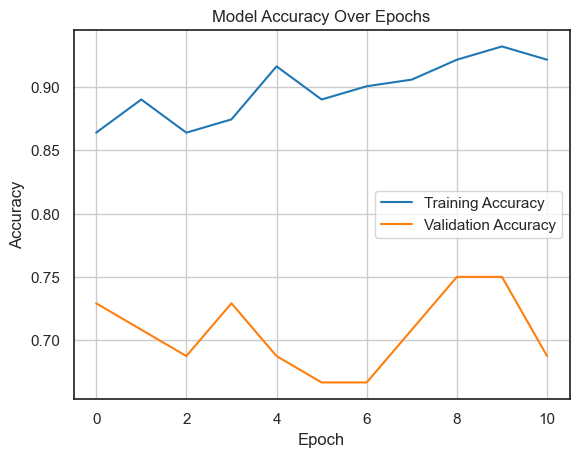

In [179]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [180]:
# Training Accuracy:
# Increases steadily up to ~98% by epoch 40.
# Shows that the model is learning patterns from the training data well.

# Validation Accuracy:
# Fluctuates heavily between ~60% to 83%
# Shows no consistent upward trend after epoch 10–15
# Frequently drops even when training accuracy improves

# This pattern indicates overfitting after a certain point.

In [181]:
# MODEL SAVING
model.save("cnn_rnn_acoustic_model.h5")

In [182]:
# PREDICT ON NEW AUDIO FILE
def predict(file_path):
    mfcc = extract_features(file_path)
    mfcc = mfcc[np.newaxis, ..., np.newaxis]  # reshape to (1, 40, 862, 1)
    prediction = model.predict(mfcc)
    predicted_label = le.inverse_transform([np.argmax(prediction)])
    return predicted_label[0]


In [183]:
print(predict("C:\\Users\\dhanu\\DATASET\\Dataset\\Whale\\rpi-orcasound-lab_2020_09_05_14_36_00.wav"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 944ms/step
Whale


In [184]:
print(predict("C:\\Users\\dhanu\\DATASET\\Dataset\\Submarine\\w61yrk874n-submarine-sfx-10.wav"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Submarine
